In [1]:
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
import h5py
import cv2
import glob

c:\users\arnau.quera-bofarull\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataset = h5py.File('dataset.hdf5')

In [3]:
images = dataset['train_img']
targets = dataset['train_label']

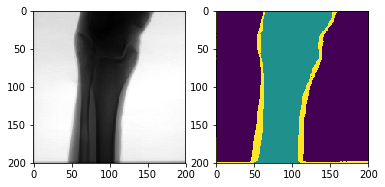

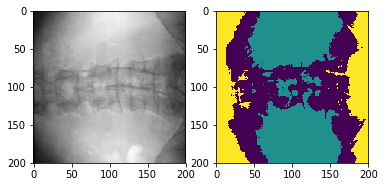

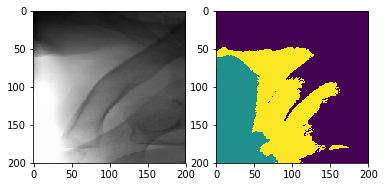

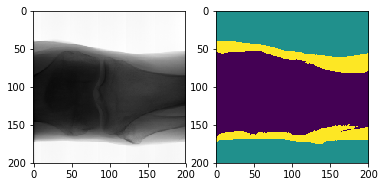

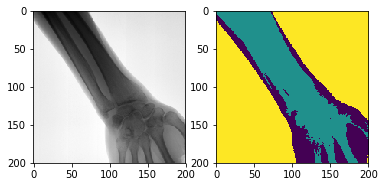

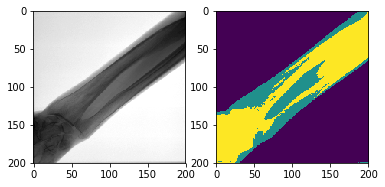

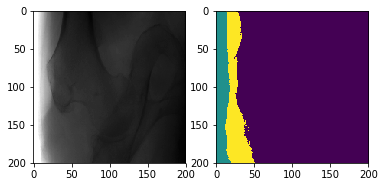

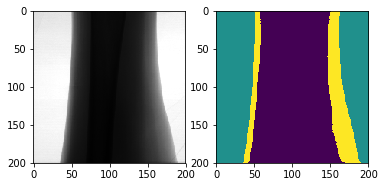

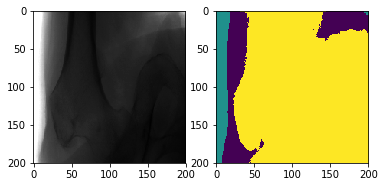

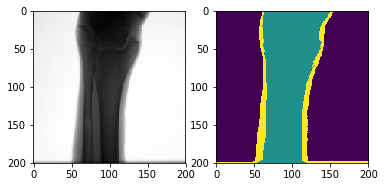

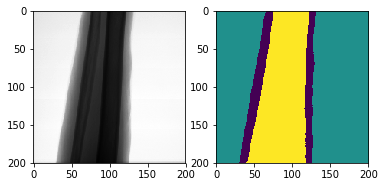

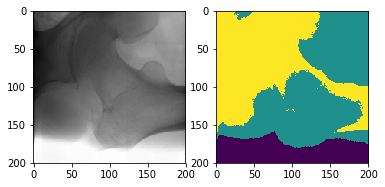

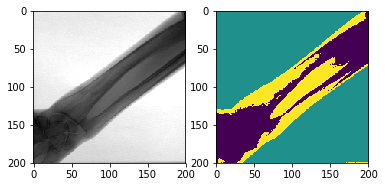

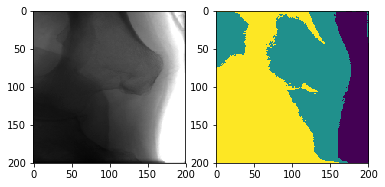

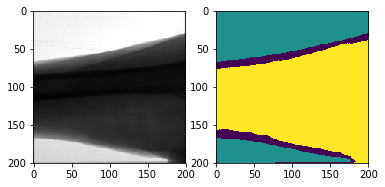

In [5]:
k_means = cluster.KMeans(n_clusters=3, n_jobs = -1, max_iter = 500)
for image in images:
    image_pixels = np.zeros(200*200)
    image_flat = np.reshape(image, 200*200)
    for i, pixel in enumerate(image_flat):
        image_pixels[i] = np.rint(255*pixel)
    image_pixels = image_pixels.reshape(-1, 1)
    k_means.fit(image_pixels)
    labels = k_means.labels_
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(image[...,0], cmap = 'gray')
    labels_image = labels.reshape((200,200))
    ax[1].imshow(labels_image)
    plt.show()
    